# Análise Brazil Covid 19

---
# Integrantes
## Eduardo Coltri - 22.118.100-1
## Gabriel Silva Figueredo - 22.118.023-5
## Pedro Zigante - 22.118.107-6
---

### Importando Bibliotecas Utilizadas

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')

In [4]:
%matplotlib inline

---
### Leitura dos dados

In [5]:
data = pd.read_csv('brazil_covid19.csv',sep=',')

---
### Início do clean-up ou realçamento dos dados

In [6]:
data.head()

,date,hour,state,suspects,refuses,cases,deaths
0,2020-01-30,16:00,Minas Gerais,1,0,0,0
1,2020-01-30,16:00,Rio de Janeiro,1,0,0,0
2,2020-01-30,16:00,Santa Catarina,0,2,0,0
3,2020-01-30,16:00,São Paulo,3,1,0,0
4,2020-01-30,16:00,Rio Grande do Sul,2,2,0,0


In [7]:
def get_mes(data):
    return data.split('-')[1]

In [8]:
data['mes'] = data['date'].apply(lambda data_atual:get_mes(data_atual))

In [9]:
data['mes'] = data['mes'].astype(int)

---
### Selecionando nosso X e Y para análise

In [10]:
x,y = data['deaths'],data['mes']

#### Média de Y e X

In [11]:
y.mean(),x.mean()

(2.7113095238095237, 0.7757936507936508)

#### Variância de Y e X

In [12]:
y.var(),x.var()

(0.23335756844942546, 43.49883750256144)

#### Desvio padrão de Y e X

In [13]:
y.std(),x.std()

(0.4830709766167136, 6.5953648498442785)

#### Mediana de Y e X

In [14]:
y.median(),x.median()

(3.0, 0.0)

#### Histogramas de X e Y, respectivamente

Text(0.5, 1.0, 'Histograma de Mortes')

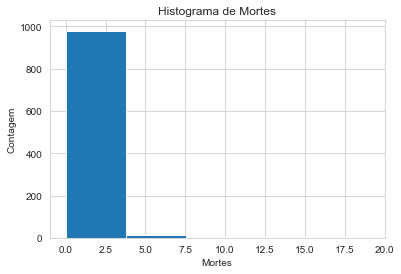

In [15]:
plt.hist(x,bins = 30)
plt.xlim((-1,20))
plt.xlabel('Mortes')
plt.ylabel('Contagem')
plt.title('Histograma de Mortes')

Text(0.5, 1.0, 'Histograma dos Meses')

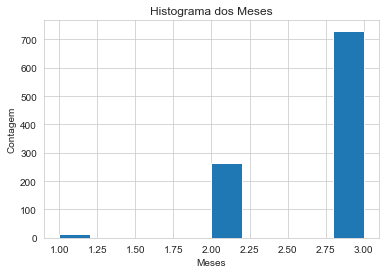

In [16]:
plt.hist(y)
plt.xlabel('Meses')
plt.ylabel('Contagem')
plt.title('Histograma dos Meses')

#### Coeficiente de corelação entre X e Y

In [17]:
np.corrcoef(x,y)

array([[1.        , 0.07036553],
       [0.07036553, 1.        ]])

---
## Regressão Linear

In [18]:
from scipy.stats import linregress

In [19]:
slope,intercept, r_value,p_value,std_err = linregress(x,y)

In [20]:
y_pred = x*slope + intercept

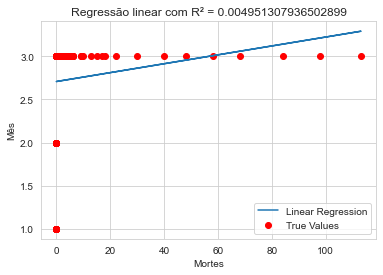

In [22]:
plt.scatter(x,y,color='r',label='True Values')
plt.plot(x,y_pred,label='Linear Regression')
plt.xlabel('Mortes')
plt.ylabel('Mês')
plt.title('Regressão linear com R² = {}'.format(r_value**2))
plt.legend()